In [ ]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd

In [ ]:
#Choosing and importing File 

from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv'])) # Dataset is now stored in a Pandas Dataframe named df
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data = df
data.head() #printing the intial rows of dataframe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
print(data.shape)
print(data.size)

(41188, 21)
864948


In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
data["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

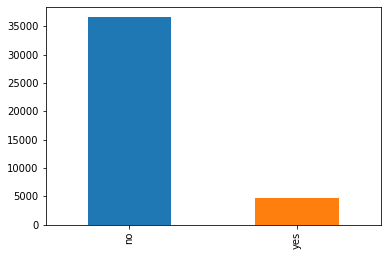

In [ ]:
%matplotlib inline

colors= ['#1f77b4','#ff7f0e']
data['y'].value_counts().plot(kind='bar', color=colors)

plt.show()

### **EXPLORATORY DATA ANALYSIS**

HEATMAP

In [ ]:
ht_data = data

ht_data.y.replace(('yes', 'no'), (1, 0), inplace=True)


In [ ]:
ht_data.y.unique()

array([0, 1])

Text(0.5, 1.0, 'HEATMAP')

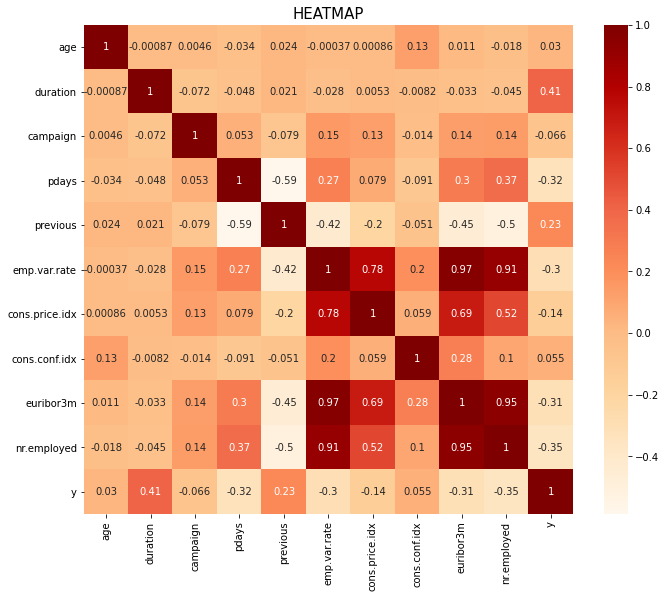

In [ ]:
# Compute the correlation matrix
# finding the pairwise correlation of all columns in the dataframe. 
corr = ht_data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, cmap="OrRd", square=True, annot=True)

plt.title("HEATMAP", size=15)

**CATEGORICAL** **ATTRIBUTES**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Job vs Y')

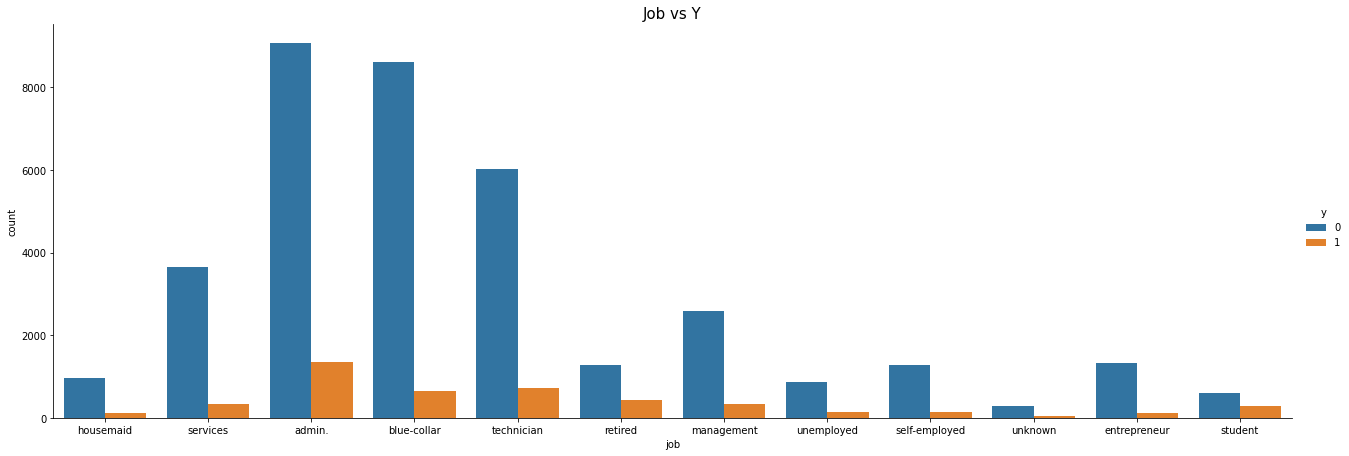

In [ ]:
sns.catplot("job", hue="y", data=data, kind="count", ax=ax, height=6, aspect= 3)

plt.title("Job vs Y", size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Marital Status vs Y')

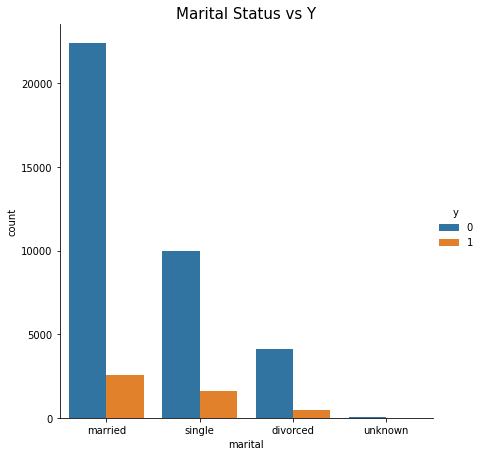

In [ ]:
sns.catplot("marital", hue="y", data=data, kind="count", ax=ax, height=6, aspect= 1)

plt.title("Marital Status vs Y", size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Education vs Y')

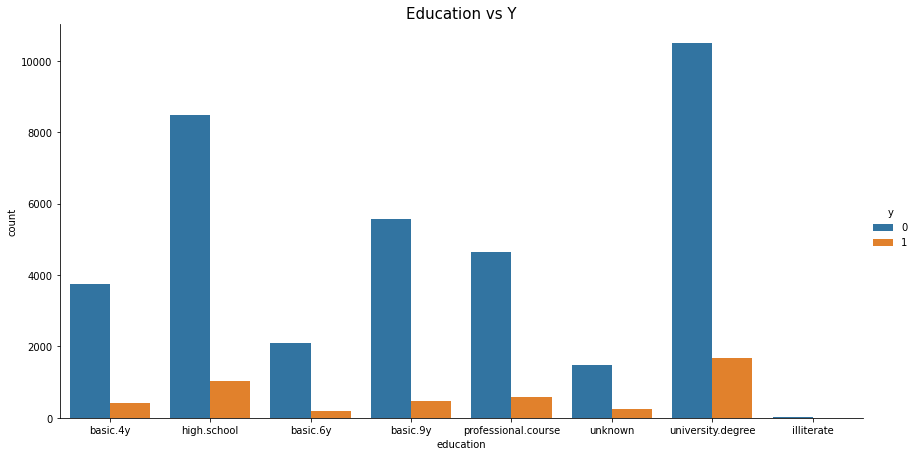

In [ ]:
sns.catplot("education", hue="y", data=data, kind="count", ax=ax, height=6, aspect= 2)

plt.title("Education vs Y", size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Default vs Y')

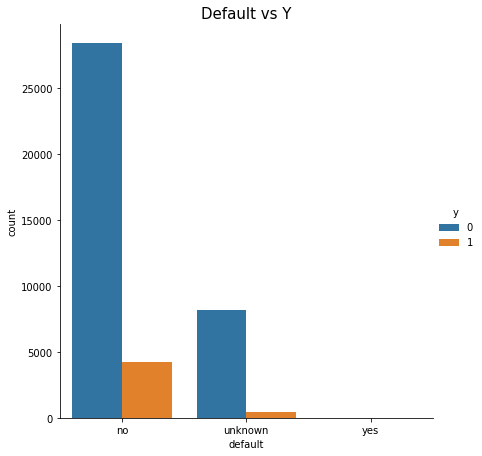

In [ ]:
sns.catplot("default", hue="y", data=data, kind="count", ax=ax, height=6, aspect= 1)

plt.title("Default vs Y", size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Housing vs Y')

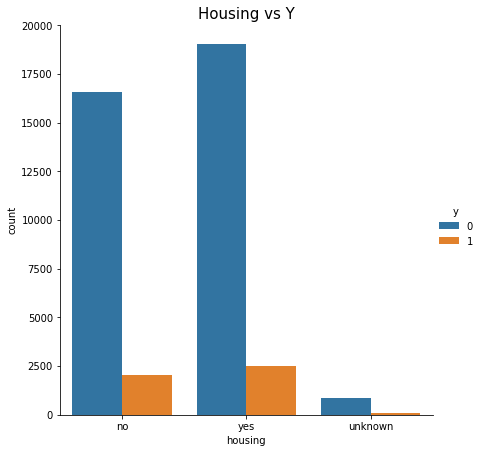

In [ ]:
sns.catplot("housing", hue="y", data=data, kind="count", ax=ax, height=6, aspect= 1)

plt.title("Housing vs Y", size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Loan vs Y')

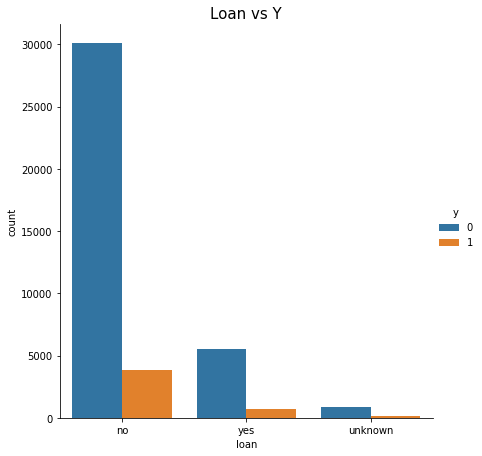

In [ ]:
sns.catplot("loan", hue="y", data=data, kind="count", ax=ax, height=6, aspect= 1)

plt.title("Loan vs Y", size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Contact vs Y')

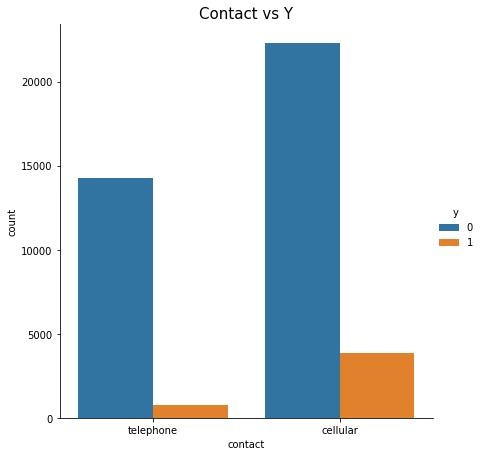

In [ ]:
sns.catplot("contact", hue="y", data=data, kind="count", ax=ax, height=6, aspect= 1)

plt.title("Contact vs Y", size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Month vs Y')

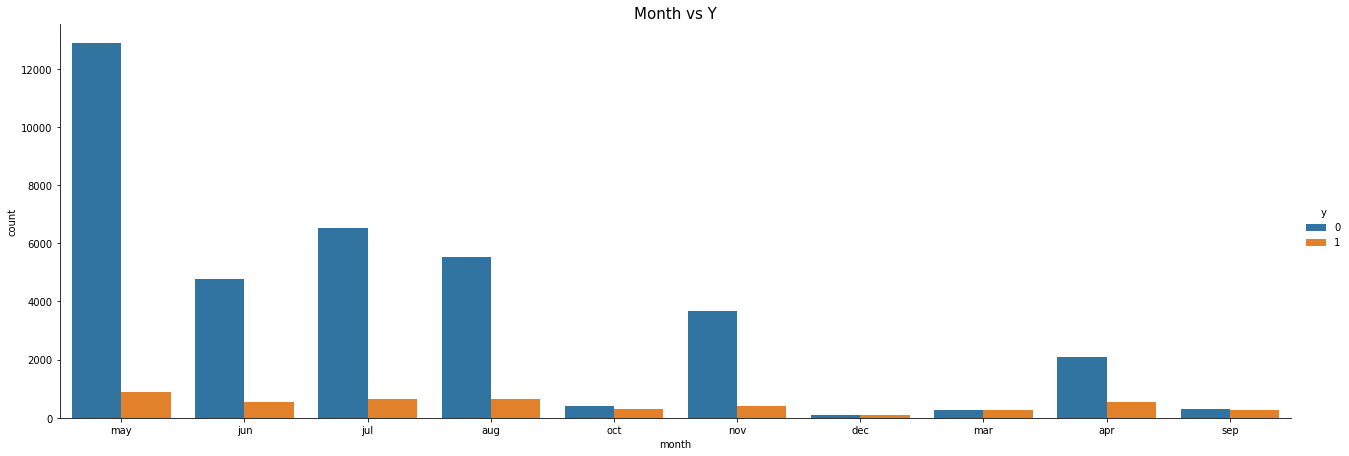

In [ ]:
sns.catplot("month", hue="y", data=data, kind="count", ax=ax, height=6, aspect= 3)

plt.title("Month vs Y", size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Day_of_week vs Y')

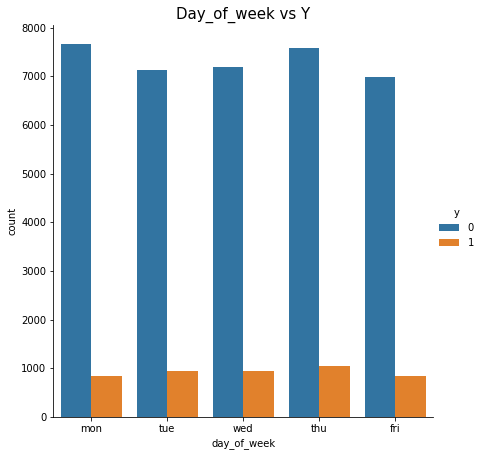

In [ ]:
sns.catplot("day_of_week", hue="y", data=data, kind="count", ax=ax, height=6, aspect= 1)

plt.title("Day_of_week vs Y", size=15) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Poutcome vs Y')

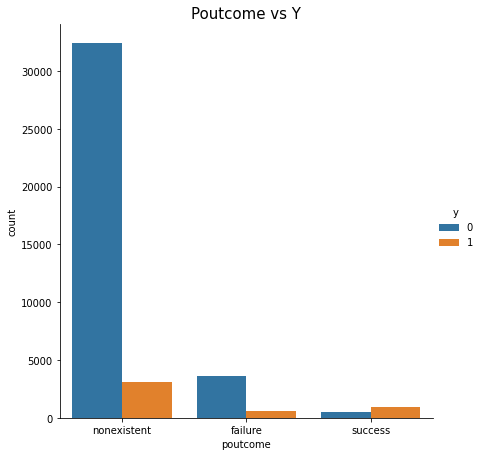

In [ ]:
sns.catplot("poutcome", hue="y", data=data, kind="count", ax=ax, height=6, aspect= 1)

plt.title("Poutcome vs Y", size=15)

**NUMERIC** **ATTRIBUTES**

Text(0.5, 1.0, ' DURATION vs Y')

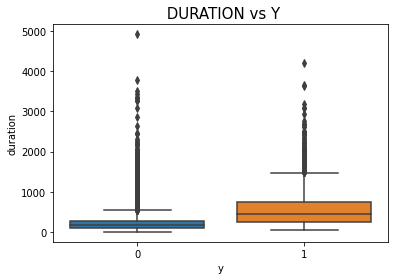

In [ ]:
sns.boxplot(data=data, x="y", y="duration")

plt.title(" DURATION vs Y", size=15) 

Text(0.5, 1.0, ' Employment Variation Rate vs Y')

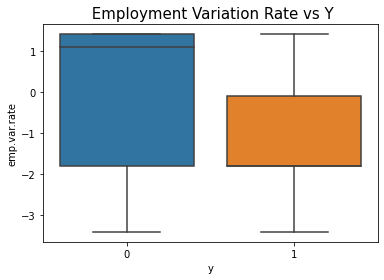

In [ ]:
sns.boxplot(data=data, x="y", y="emp.var.rate")

plt.title(" Employment Variation Rate vs Y", size=15) 

Text(0.5, 1.0, ' Number of Employees vs Y')

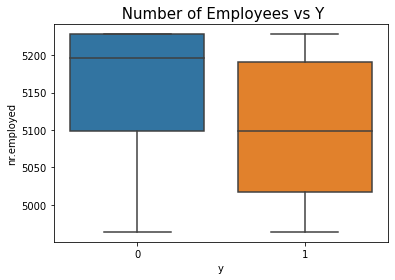

In [ ]:
sns.boxplot(data=data, x="y", y="nr.employed")
plt.title(" Number of Employees vs Y", size=15)  

Text(0.5, 1.0, ' Euribor 3 month rate vs Y')

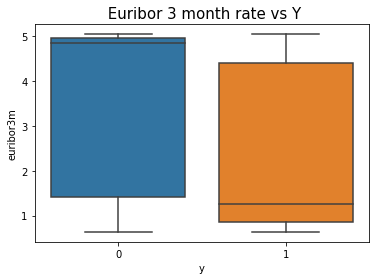

In [ ]:
sns.boxplot(data=data, x="y", y="euribor3m")
plt.title(" Euribor 3 month rate vs Y", size=15)  

### **DATA PREPROCESSING**

In [ ]:
# Again loading raw data into our dataframe

data = df
data.shape

(41188, 21)

In [ ]:
#Deleting unknown Values
df2 = df[~df['job'].isin(['unknown'])]
df2 = df2[~df['marital'].isin(['unknown'])]
df2 = df2[~df['education'].isin(['unknown'])]
df2 = df2[~df['default'].isin(['unknown'])]
df2 = df2[~df['housing'].isin(['unknown'])]
df2 = df2[~df['loan'].isin(['unknown'])]
df2 = df2[~df['contact'].isin(['unknown'])]
df2 = df2[~df['month'].isin(['unknown'])]
df2 = df2[~df['day_of_week'].isin(['unknown'])]
df2 = df2[~df['poutcome'].isin(['unknown'])]


In [ ]:
#Checking the shape of retained data after deletion
#Only 74% of data is retained 26% is removed 
#We can't delete so much amount of data so we will consider Unknown as Class labels
df2.shape

(30488, 21)

In [ ]:
# We already know that we don't have any Null values 
# We will check data for duplicate values and get rid of them

dup_row = data[data.duplicated()]

dup_row.shape

(12, 21)

In [ ]:
#checking original data size
data.shape

(41188, 21)

In [ ]:
#dropping duplicate rows
data=data.drop_duplicates()

#checking data size after dropping duplicates
data.shape

(41176, 21)

SEPARATE DEPENDENT & INDEPENDENT VARIABLES

In [ ]:
data_x= data.iloc[:,:-1]
data_y= data['y']


Splitting  Data

In [ ]:
from sklearn.model_selection import train_test_split

#Avoiding Data Leakage by splitting the data first
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=123)

In [ ]:
print("Shape of Independent Attributes training set",x_train.shape)
print("Shape of Dependent Attribute training set",y_train.shape)
print("Shape of Independent Attribute testing set",x_test.shape)
print("Shape of Dependent Attribute testing set",y_test.shape)


Shape of Independent Attributes training set (32940, 20)
Shape of Dependent Attribute training set (32940,)
Shape of Independent Attribute testing set (8236, 20)
Shape of Dependent Attribute testing set (8236,)


# **ONE HOT ENCODING**
https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

In [ ]:
x_train= encode_and_bind(x_train, 'job')
x_train= encode_and_bind(x_train, 'marital')
x_train= encode_and_bind(x_train, 'education')
x_train= encode_and_bind(x_train, 'default')
x_train= encode_and_bind(x_train, 'housing')
x_train= encode_and_bind(x_train, 'loan')
x_train= encode_and_bind(x_train, 'contact')
x_train= encode_and_bind(x_train, 'month')
x_train= encode_and_bind(x_train, 'day_of_week')
x_train= encode_and_bind(x_train, 'poutcome')


In [ ]:
x_test= encode_and_bind(x_test, 'job')
x_test= encode_and_bind(x_test, 'marital')
x_test= encode_and_bind(x_test, 'education')
x_test= encode_and_bind(x_test, 'default')
x_test= encode_and_bind(x_test, 'housing')
x_test= encode_and_bind(x_test, 'loan')
x_test= encode_and_bind(x_test, 'contact')
x_test= encode_and_bind(x_test, 'month')
x_test= encode_and_bind(x_test, 'day_of_week')
x_test= encode_and_bind(x_test, 'poutcome')


In [ ]:
x_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
     

In [ ]:
x_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
2802,29,services,divorced,high.school,no,no,no,telephone,may,wed,282,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
12776,55,services,married,basic.6y,unknown,no,no,cellular,jul,tue,31,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9018,32,services,single,basic.6y,no,unknown,unknown,telephone,jun,thu,131,3,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
10392,39,admin.,single,high.school,no,yes,no,telephone,jun,mon,358,1,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
7701,57,services,divorced,high.school,no,yes,no,telephone,may,fri,288,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
print(x_train.shape)
x_test.shape

(32940, 73)


(8236, 73)

In [ ]:
categorical_cols= ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [ ]:
x_train = x_train.drop(categorical_cols, axis=1)
x_train.head()

In [ ]:
x_test = x_test.drop(categorical_cols, axis=1)

In [ ]:
x_test.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
2802,29,282,1,999,0,1.1,93.994,-36.4,4.859,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
12776,55,31,3,999,0,1.4,93.918,-42.7,4.962,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9018,32,131,3,999,0,1.4,94.465,-41.8,4.866,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
10392,39,358,1,999,0,1.4,94.465,-41.8,4.960,5228.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
7701,57,288,2,999,0,1.1,93.994,-36.4,4.864,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
print(x_train.shape)
x_test.shape

(32940, 63)


(8236, 63)

BINARY ENCODING TARGET VARIABLE

In [ ]:
# Replace "no" with 0 and "yes" with 1

y_train.replace({"no":0, "yes":1}, inplace=True)

y_test.replace({"no":0, "yes":1}, inplace=True)


In [ ]:
print(y_train.head())
print(y_test.head())

12787    0
24409    0
39632    0
41176    0
5988     0
Name: y, dtype: int64
2802     0
12776    0
9018     0
10392    0
7701     0
Name: y, dtype: int64


LOGISTIC REGRESSION

In [ ]:
x_train.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [ ]:
# with "duration" column
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)

print("AUC score with duration column: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score with duration column:  0.9287324870873535


In [ ]:
y_pred = model.predict_proba(x_test) 
print(y_pred)#just checking what it prints

[[0.98425533 0.01574467]
 [0.99268351 0.00731649]
 [0.98779842 0.01220158]
 ...
 [0.8796183  0.1203817 ]
 [0.96591535 0.03408465]
 [0.98823099 0.01176901]]


In [ ]:
a= model.score(x_test, y_test)

print("Accuracy score with duration column: ",a)

Accuracy score with duration column:  0.9066294317629917


In [ ]:
y_pred = model.predict(x_test) 
print(y_pred)#just checking what it prints

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7290
           1       0.65      0.40      0.50       946

    accuracy                           0.91      8236
   macro avg       0.79      0.69      0.72      8236
weighted avg       0.89      0.91      0.90      8236



In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX:",CM)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

CONFUSION MATRIX: [[7085  205]
 [ 564  382]]


In [ ]:
total= TN+FN+TP+FP

Acc= (TP+TN) / total
Recall = TP/ (TP+FN)
Prec= TP/ (TP + FP)

print("Accuracy",Acc)
print("Recall",Recall)
print("Prec",Prec)


Accuracy 0.9066294317629917
Recall 0.40380549682875266
Prec 0.6507666098807495


In [ ]:
model.coef_

array([[ 4.29917381e-03,  4.59095471e-03, -4.42126537e-02,
        -1.79968227e-03, -1.93267839e-01, -2.80093893e-01,
         3.32600116e-01,  2.69873583e-02, -1.70960835e-01,
        -6.22300552e-03,  6.81669365e-02, -2.20091980e-01,
        -3.85340912e-02, -7.61793114e-03,  9.70681715e-03,
         1.01353814e-01, -5.65220145e-04, -6.39882510e-02,
         8.81406485e-02,  4.17562754e-02,  1.90221901e-02,
         5.50486155e-03, -1.58225757e-02, -8.59971195e-02,
         1.06741983e-01, -2.06821832e-03, -6.21230018e-02,
        -4.20849879e-02, -1.00245356e-01, -4.00287147e-02,
         1.91588700e-03,  2.07362624e-02,  1.91913206e-01,
         3.27707744e-02,  1.86222521e-01, -1.83295296e-01,
        -7.31560485e-05,  9.16171720e-03, -1.72897496e-02,
         1.09821020e-02,  3.98106079e-02, -1.72897496e-02,
        -1.96667887e-02,  2.43111445e-01, -2.40257375e-01,
         2.56086251e-02,  1.26859515e-01,  8.20046339e-03,
         1.75230477e-01,  1.63107146e-01,  2.61869162e-0

In [ ]:
log_odds = model.coef_[0]
b = pd.DataFrame(log_odds, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

print(np.exp(b[0:30]))
print(np.exp(b[31:63]))

                                   coef
cons.price.idx                 1.394590
month_mar                      1.299357
contact_cellular               1.275211
education_university.degree    1.211565
default_no                     1.204690
poutcome_nonexistent           1.195846
month_jul                      1.191521
month_jun                      1.177163
month_aug                      1.135258
marital_single                 1.112647
job_retired                    1.106668
job_student                    1.092142
day_of_week_wed                1.074329
job_admin.                     1.070544
day_of_week_tue                1.059670
job_technician                 1.042640
loan_no                        1.040614
education_unknown              1.033314
poutcome_success               1.032851
cons.conf.idx                  1.027355
month_apr                      1.025939
education_professional.course  1.020953
job_unemployed                 1.019204
month_oct                      1.018273


# **LOGISTIC REGRESSION WITHOUT DURATION COLUMN WITH TRAINING TESTING DATA**

In [ ]:
x_train= x_train.drop("duration", axis=1)
x_test= x_test.drop("duration", axis=1)


In [ ]:
x_train.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

In [ ]:
# without "duration" column
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)

print("AUC score without duration column: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score without duration column:  0.7814132568869865


In [ ]:
y_pred = model.predict_proba(x_test) 
print(y_pred)#just checking what it prints

[[0.96596212 0.03403788]
 [0.95241011 0.04758989]
 [0.95273789 0.04726211]
 ...
 [0.97479776 0.02520224]
 [0.93175622 0.06824378]
 [0.9689354  0.0310646 ]]


In [ ]:
a= model.score(x_test, y_test)

print("Accuracy score with duration column: ",a)

Accuracy score with duration column:  0.8967945604662457


In [ ]:
y_pred = model.predict(x_test) 
print(y_pred)#just checking what it prints

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7290
           1       0.65      0.23      0.33       946

    accuracy                           0.90      8236
   macro avg       0.78      0.60      0.64      8236
weighted avg       0.88      0.90      0.87      8236



In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX:",CM)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

CONFUSION MATRIX: [[7173  117]
 [ 733  213]]


In [ ]:
total= TN+FN+TP+FP

Acc= (TP+TN) / total
Recall = TP/ (TP+FN)
Prec= TP/ (TP + FP)

print("Accuracy",Acc)
print("Recall",Recall)
print("Prec",Prec)


Accuracy 0.8967945604662457
Recall 0.2251585623678647
Prec 0.6454545454545455


In [ ]:
model.coef_

array([[ 3.55971736e-03, -4.66848167e-02, -1.77344082e-03,
        -1.89317593e-01, -1.80015233e-01,  3.34331206e-01,
         2.47905637e-02, -1.27572090e-01, -5.95455907e-03,
         5.47765350e-02, -1.53752692e-01, -1.43424907e-02,
        -1.19274125e-02, -2.71938040e-03,  7.73914654e-02,
         8.22873152e-03, -5.13415770e-02,  7.01339670e-02,
         1.60898430e-02,  1.03058365e-02, -3.37008563e-04,
        -1.87802376e-02, -7.03846092e-02,  9.11869271e-02,
         4.83737173e-04, -3.79042174e-02, -1.15511117e-02,
        -8.22493778e-02, -2.19632756e-02,  1.94994250e-03,
         8.40000883e-04,  1.27822391e-01,  2.55614653e-02,
         1.50808060e-01, -1.48118523e-01, -1.83720204e-04,
         1.81310239e-02, -9.20266183e-03, -6.42254457e-03,
         1.65008785e-02, -9.20266183e-03, -4.79239919e-03,
         2.51991158e-01, -2.49485340e-01,  6.18444575e-02,
         3.30027969e-02,  2.12476836e-02,  1.96232851e-01,
         9.79590241e-02,  1.63865570e-01, -5.24363450e-0

In [ ]:
log_odds = model.coef_[0]
b = pd.DataFrame(log_odds, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

print(np.exp(b[0:30]))
print(np.exp(b[31:63]))

                                   coef
cons.price.idx                 1.397006
contact_cellular               1.286585
month_jul                      1.216810
poutcome_nonexistent           1.193248
month_mar                      1.178056
default_no                     1.162773
education_university.degree    1.136351
month_jun                      1.102918
marital_single                 1.095474
job_retired                    1.080465
day_of_week_wed                1.078994
job_student                    1.072652
day_of_week_thu                1.065331
month_apr                      1.063797
job_admin.                     1.056305
month_aug                      1.033553
education_unknown              1.025891
cons.conf.idx                  1.025100
month_dec                      1.021475
poutcome_success               1.020953
month_oct                      1.019363
housing_no                     1.018296
loan_no                        1.016638
job_technician                 1.016220


# **`LOGISTIC REGRESSION WITHOUT DURATION ATTRIBUTE DONE CV `**


Dropping Duration Column

In [ ]:
x = data_x.drop("duration", axis=1)

y = data_y

In [ ]:
x.shape

(41176, 19)

In [ ]:
data_y.head()

In [ ]:
#Encoding entire categorical data 

x= encode_and_bind(x, 'job')
x= encode_and_bind(x, 'marital')
x= encode_and_bind(x, 'education')
x= encode_and_bind(x, 'default')
x= encode_and_bind(x, 'housing')
x= encode_and_bind(x, 'loan')
x= encode_and_bind(x, 'contact')
x= encode_and_bind(x, 'month')
x= encode_and_bind(x, 'day_of_week')
x= encode_and_bind(x, 'poutcome')


In [ ]:
x = x.drop(categorical_cols, axis=1)

In [ ]:
x.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
y.replace({"no":0, "yes":1}, inplace=True)

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

CROSS VALIDATION & LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from numpy import mean

model_log_crossval = LogisticRegression(max_iter=2000)
predicted_auc = cross_val_score(model_log_crossval,x,y,scoring="roc_auc", cv =10)

print(predicted_auc)

print("AUC score without duration column: ",mean(predicted_auc))

[0.63195418 0.18263759 0.16138018 0.48951079 0.28328426 0.76063136
 0.95503906 0.39325023 0.92811353 0.65597094]
AUC score without duration column:  0.5441772122688159


In [ ]:
#Not sure what are we getting from this 
predicted_acc= cross_val_predict(model_log_crossval,x,y, cv = 7)

In [ ]:
print(mean(predicted_acc))

0.1412959005245774


In [ ]:
target_names = ['no','yes']
print(classification_report(y, predicted_acc, target_names=target_names))

              precision    recall  f1-score   support

          no       0.89      0.86      0.88     36537
         yes       0.15      0.18      0.16      4639

    accuracy                           0.79     41176
   macro avg       0.52      0.52      0.52     41176
weighted avg       0.81      0.79      0.80     41176



In [ ]:
CM = confusion_matrix(y, predicted_acc)
print("CONFUSION MATRIX:",CM)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

CONFUSION MATRIX: [[31572  4965]
 [ 3786   853]]


In [ ]:
total= TN+FN+TP+FP

#How many correct predictions does our model make
Acc= (TP+TN) / total 

#Out of the Actual positivies how many we were able to predict
Recall = TP/ (TP+FN)

#Out of the predicted pos how many were actually pos
Prec= TP/ (TP + FP)

print("Accuracy",Acc)
print("Recall",Recall)
print("Prec",Prec)

Accuracy 0.7874732854089761
Recall 0.1838758353093339
Prec 0.14661395668614643


**RANDOM FOREST WITHOUT CV & DURATION COLUMN**

In [ ]:
x_test.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
2802,29,282,1,999,0,1.1,93.994,-36.4,4.859,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
12776,55,31,3,999,0,1.4,93.918,-42.7,4.962,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9018,32,131,3,999,0,1.4,94.465,-41.8,4.866,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
10392,39,358,1,999,0,1.4,94.465,-41.8,4.960,5228.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
7701,57,288,2,999,0,1.1,93.994,-36.4,4.864,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
x_train_rf = x_train
x_test_rf = x_test
y_test_rf = y_test
y_train_rf = y_train


In [ ]:
x_train_rf = x_train_rf.drop("duration", axis=1)
x_test_rf = x_test_rf.drop("duration", axis=1)

In [ ]:
y_test_rf.head()

2802     0
12776    0
9018     0
10392    0
7701     0
Name: y, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest =  RandomForestClassifier(n_estimators=20, random_state=0)


In [ ]:
forest.fit(x_train_rf, y_train_rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf = forest.predict(x_test_rf)

In [ ]:
y_pred_rf.shape

(8236,)

In [ ]:
y_test_rf.shape

(8236,)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test_rf,y_pred_rf))
print("Accuracy", accuracy_score(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7290
           1       0.54      0.30      0.38       946

    accuracy                           0.89      8236
   macro avg       0.73      0.63      0.66      8236
weighted avg       0.87      0.89      0.88      8236

Accuracy 0.8898737251092763


In [ ]:
y_pred_rf_auc = forest.predict_proba(x_test_rf)

print("AUC score with duration column: ", roc_auc_score(y_test_rf, y_pred_rf_auc[:,1]))

AUC score with duration column:  0.7564956919177419


In [ ]:
#CONFUSION MATRIX

CM_RF= confusion_matrix(y_test_rf,y_pred_rf)
print(CM_RF)

TN = CM_RF[0][0]
FN = CM_RF[1][0]
TP = CM_RF[1][1]
FP = CM_RF[0][1]

total= TN+FN+TP+FP

Acc= (TP+TN) / total
Recall = TP/ (TP+FN)
Prec= TP/ (TP + FP)

print("Accuracy",Acc)
print("Recall",Recall)
print("Prec",Prec)

[[7047  243]
 [ 664  282]]
Accuracy 0.8898737251092763
Recall 0.29809725158562367
Prec 0.5371428571428571


Feature importance is one of the key aspects of a machine learning model. Understanding which variable is contributing the most to a model is critical to interpreting the results. This is what data scientists strive for when building models that need to be explained to non-technical stakeholders.

Our dataset has multiple features and it is often difficult to understand which feature is dominant. This is where the feature importance function of random forest is so helpful.

In [ ]:
forest.feature_importances_

array([1.59745923e-01, 8.11580336e-02, 2.68466728e-02, 1.53344758e-02,
       3.10831152e-02, 2.35183577e-02, 2.03065582e-02, 1.30120600e-01,
       4.55934245e-02, 1.66139629e-02, 1.17309399e-02, 5.96986541e-03,
       4.78065476e-03, 9.22007250e-03, 6.12362351e-03, 5.99194038e-03,
       8.41376359e-03, 5.12419247e-03, 1.42126018e-02, 4.83251562e-03,
       2.13740381e-03, 1.01298407e-02, 1.68304426e-02, 1.54965467e-02,
       8.01147873e-04, 7.92996502e-03, 6.62520914e-03, 1.07256615e-02,
       1.57213876e-02, 2.74237114e-04, 1.20332832e-02, 1.61137994e-02,
       6.20561642e-03, 6.71757652e-03, 7.02738944e-03, 1.09620790e-07,
       2.16300330e-02, 2.48168881e-03, 1.99570989e-02, 1.42652839e-02,
       2.57819863e-03, 1.34137480e-02, 7.75816345e-03, 8.75634794e-03,
       3.42480268e-03, 2.83708090e-03, 5.93254383e-04, 3.24923199e-03,
       3.33366791e-03, 3.27840322e-03, 4.47049523e-03, 2.27622756e-03,
       4.83009209e-03, 2.95118021e-03, 1.46152577e-02, 1.52157616e-02,
      

In [ ]:
for col,score in zip(x_train_rf.columns,forest.feature_importances_):
        print(col,score)

In [ ]:
importances = list(zip(forest.feature_importances_, x_train_rf.columns))

In [ ]:
print(importances)

[(0.1597459230130764, 'age'), (0.08115803362371288, 'campaign'), (0.026846672820845453, 'pdays'), (0.015334475784778265, 'previous'), (0.031083115158758952, 'emp.var.rate'), (0.02351835769270132, 'cons.price.idx'), (0.02030655822637099, 'cons.conf.idx'), (0.13012060043723808, 'euribor3m'), (0.0455934245349544, 'nr.employed'), (0.01661396293995692, 'job_admin.'), (0.011730939904940924, 'job_blue-collar'), (0.005969865411406162, 'job_entrepreneur'), (0.004780654764746116, 'job_housemaid'), (0.0092200724962649, 'job_management'), (0.006123623511739713, 'job_retired'), (0.005991940375304605, 'job_self-employed'), (0.008413763591863202, 'job_services'), (0.00512419246571828, 'job_student'), (0.014212601826937274, 'job_technician'), (0.004832515617933285, 'job_unemployed'), (0.002137403806966769, 'job_unknown'), (0.010129840747009941, 'marital_divorced'), (0.01683044262666559, 'marital_married'), (0.01549654667887534, 'marital_single'), (0.000801147872807434, 'marital_unknown'), (0.007929965

In [ ]:
# print in new line
importances.sort(reverse=True)  
print(*importances, sep = "\n")

(0.1597459230130764, 'age')
(0.13012060043723808, 'euribor3m')
(0.08115803362371288, 'campaign')
(0.0455934245349544, 'nr.employed')
(0.031083115158758952, 'emp.var.rate')
(0.026846672820845453, 'pdays')
(0.024148700159423366, 'poutcome_success')
(0.02351835769270132, 'cons.price.idx')
(0.02163003304360902, 'housing_no')
(0.02030655822637099, 'cons.conf.idx')
(0.01995709893679167, 'housing_yes')
(0.01683044262666559, 'marital_married')
(0.01661396293995692, 'job_admin.')
(0.016113799355821513, 'education_university.degree')
(0.01572138760721454, 'education_high.school')
(0.01549654667887534, 'marital_single')
(0.015334475784778265, 'previous')
(0.015215761649577737, 'day_of_week_mon')
(0.015089430290530526, 'day_of_week_wed')
(0.014849310248055952, 'day_of_week_thu')
(0.014615257717565147, 'day_of_week_fri')
(0.014319999436386491, 'day_of_week_tue')
(0.014265283858332558, 'loan_no')
(0.014212601826937274, 'job_technician')
(0.013413748014078467, 'loan_yes')
(0.01203328321468635, 'educa

In [ ]:
# Plotting only top 10 features
top_10 = importances[:10]

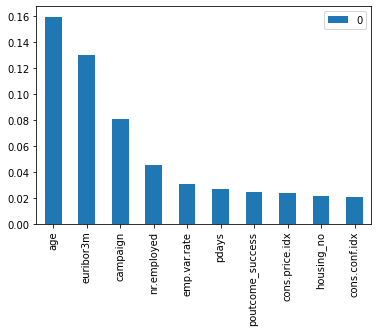

In [ ]:
pd.DataFrame(top_10, index=[x for (_,x) in top_10]).plot(kind = 'bar')